# Taxi Trip Time Prediction

### Problem Statement

Build a predictive framework that is able to infer the trip time of taxi rides in Porto, Portugal

### Dataset Description

Each data sample corresponds to one completed trip. It contains a total of
9 (nine) features, described as follows:

TRIP_ID: (String) It contains an unique identifier for each trip;

CALL_TYPE: (char) It identifies the way used to demand this service. It may contain one of three possible values:
‘A’ if this trip was dispatched from the central;
‘B’ if this trip was demanded directly to a taxi driver on a specific stand;
‘C’ otherwise (i.e. a trip demanded on a random street).

ORIGIN_CALL: (integer) It contains an unique identifier for each phone number which was used to demand, at least, one service. It identifies the trip’s customer if CALL_TYPE=’A’. Otherwise, it assumes a NULL value;

ORIGIN_STAND: (integer): It contains an unique identifier for the taxi stand. It identifies the starting point of the trip if 
CALL_TYPE=’B’. Otherwise, it assumes a NULL value;

TAXI_ID: (integer): It contains an unique identifier for the taxi driver that performed each trip;

TIMESTAMP: (integer) Unix Timestamp (in seconds). It identifies the trip’s start; 

DAYTYPE: (char) It identifies the daytype of the trip’s start. It assumes one of three possible values:
‘B’ if this trip started on a holiday or any other special day (i.e. extending holidays, floating holidays, etc.);
‘C’ if the trip started on a day before a type-B day;
‘A’ otherwise (i.e. a normal day, workday or weekend).

MISSING_DATA: (Boolean) It is FALSE when the GPS data stream is complete and TRUE whenever one (or more) locations are missing

POLYLINE: (String): It contains a list of GPS coordinates (i.e. WGS84 format) mapped as a string. The beginning and the end of the string are identified with brackets (i.e. [ and ], respectively). Each pair of coordinates is also identified by the same brackets as [LONGITUDE, LATITUDE]. This list contains one pair of coordinates for each 15 seconds of trip. The last list item corresponds to the trip’s destination while the first one represents its start;

The total travel time of the trip (the prediction target of this competition) is defined as the (number of points-1) x 15 seconds. For example, a trip with 101 data points in POLYLINE has a length of (101-1) * 15 = 1500 seconds. Some trips have missing data points in POLYLINE, indicated by MISSING_DATA column, and it is part of the challenge how you utilize this knowledge. 

### Dataset Loading

In [1]:
import pandas as pd

train_data_path = '/Users/sonamrathod/Documents/Rutgers/Course/AML/pkdd-15-taxi-trip-time-prediction-ii/train.csv'
test_data_path = '/Users/sonamrathod/Documents/Rutgers/Course/AML/pkdd-15-taxi-trip-time-prediction-ii/test.csv'

# Load the data into pandas DataFrames
train = pd.read_csv(train_data_path)
test = pd.read_csv(test_data_path)
# Load the metadata file for taxi stand information
metadata = pd.read_csv('/Users/sonamrathod/Documents/Rutgers/Project/Git_Repo/AML/metaData_taxistandsID_name_GPSlocation.csv')

train.head()

,TRIP_ID,CALL_TYPE,ORIGIN_CALL,ORIGIN_STAND,TAXI_ID,TIMESTAMP,DAY_TYPE,MISSING_DATA,POLYLINE
0,1372636858620000589,C,NaN,NaN,20000589,1372636858,A,False,"[[-8.618643,41.141412],[-8.618499,41.141376],[..."
1,1372637303620000596,B,NaN,7.0,20000596,1372637303,A,False,"[[-8.639847,41.159826],[-8.640351,41.159871],[..."
2,1372636951620000320,C,NaN,NaN,20000320,1372636951,A,False,"[[-8.612964,41.140359],[-8.613378,41.14035],[-..."
3,1372636854620000520,C,NaN,NaN,20000520,1372636854,A,False,"[[-8.574678,41.151951],[-8.574705,41.151942],[..."
4,1372637091620000337,C,NaN,NaN,20000337,1372637091,A,False,"[[-8.645994,41.18049],[-8.645949,41.180517],[-..."


### Dataset Information

In [2]:
# Display information about the datasets
print("Train Dataset Info:")
print(train.info())

print("\nTest Dataset Info:")
print(test.info())

# Display the first few rows of each dataset for inspection
print("\nFirst few rows of the Train Dataset:")
print(train.head())

print("\nFirst few rows of the Test Dataset:")
print(test.head())

Train Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1710670 entries, 0 to 1710669
Data columns (total 9 columns):
 #   Column        Dtype  
---  ------        -----  
 0   TRIP_ID       int64  
 1   CALL_TYPE     object 
 2   ORIGIN_CALL   float64
 3   ORIGIN_STAND  float64
 4   TAXI_ID       int64  
 5   TIMESTAMP     int64  
 6   DAY_TYPE      object 
 7   MISSING_DATA  bool   
 8   POLYLINE      object 
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 106.0+ MB
None

Test Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TRIP_ID       320 non-null    object 
 1   CALL_TYPE     320 non-null    object 
 2   ORIGIN_CALL   72 non-null     float64
 3   ORIGIN_STAND  123 non-null    float64
 4   TAXI_ID       320 non-null    int64  
 5   TIMESTAMP     320 non-null    int64  
 6   DAY_TYPE      320 no

### Duplicate Data

In [3]:
train.drop_duplicates(inplace=True)
test.drop_duplicates(inplace=True)

### Check Missing Values

In [4]:
# Calculate percentage of missing data per column for train and test datasets
train_missing_percent = train.isnull().mean() * 100
test_missing_percent = test.isnull().mean() * 100

# Calculate overall percentage of missing data in train and test datasets
train_total_missing_percent = train.isnull().sum().sum() / (train.shape[0] * train.shape[1]) * 100
test_total_missing_percent = test.isnull().sum().sum() / (test.shape[0] * test.shape[1]) * 100

# Display the results
print("Percentage of missing data per column in Train Dataset:")
print(train_missing_percent)

print("\nOverall percentage of missing data in Train Dataset:")
print(f"{train_total_missing_percent:.2f}%")

print("\nPercentage of missing data per column in Test Dataset:")
print(test_missing_percent)

print("\nOverall percentage of missing data in Test Dataset:")
print(f"{test_total_missing_percent:.2f}%")

Percentage of missing data per column in Train Dataset:
TRIP_ID          0.000000
CALL_TYPE        0.000000
ORIGIN_CALL     78.676738
ORIGIN_STAND    52.850029
TAXI_ID          0.000000
TIMESTAMP        0.000000
DAY_TYPE         0.000000
MISSING_DATA     0.000000
POLYLINE         0.000000
dtype: float64

Overall percentage of missing data in Train Dataset:
14.61%

Percentage of missing data per column in Test Dataset:
TRIP_ID          0.0000
CALL_TYPE        0.0000
ORIGIN_CALL     77.5000
ORIGIN_STAND    61.5625
TAXI_ID          0.0000
TIMESTAMP        0.0000
DAY_TYPE         0.0000
MISSING_DATA     0.0000
POLYLINE         0.0000
dtype: float64

Overall percentage of missing data in Test Dataset:
15.45%


#### Exploratory Data Analysis

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


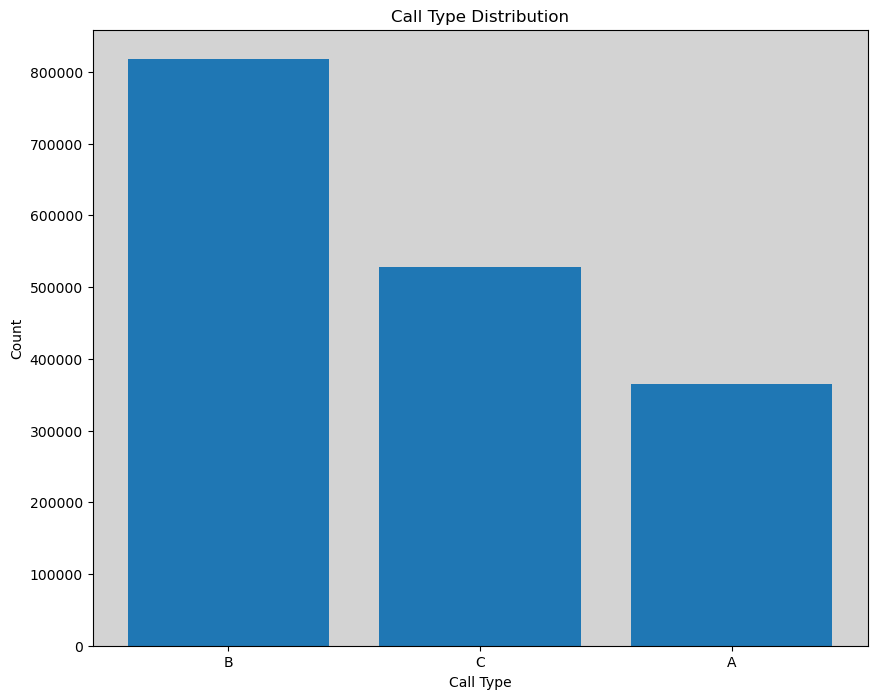

In [6]:
call_type = train['CALL_TYPE'].value_counts()

plt.figure(figsize=(10, 8))
plt.bar(call_type.index, call_type.values)
plt.gca().set_facecolor("lightgrey")
plt.xlabel('Call Type')
plt.ylabel('Count')
plt.title('Call Type Distribution')

# Show the plot
plt.show()

In [7]:
missing_count = train['MISSING_DATA'].sum()
print(f'{missing_count} Number of times the GPS track the trip.')

10 Number of times the GPS track the trip.


In [8]:
missing_call = train['ORIGIN_CALL'].isnull().sum()
missing_count = train['ORIGIN_STAND'].isnull().sum()
print(f'Missing Original Call : {missing_call}')
print(f'Missing Original stand : {missing_count}')

unique_calls = train['ORIGIN_CALL'].nunique()
unique_stands = train['ORIGIN_STAND'].nunique()

print(f'Number of unique calls made :  {unique_calls}')
print(f'Number of taxi stand where customer was picked : {unique_stands}')

Missing Original Call : 1345897
Missing Original stand : 904088
Number of unique calls made :  57105
Number of taxi stand where customer was picked : 63


### Data Preprocessing

##### Convert the Unix timestamps to human-readable dates and extracting temporal features

In [9]:
from datetime import datetime
import ast
import seaborn as sns
import matplotlib.pyplot as plt

train['DATETIME'] = pd.to_datetime(train['TIMESTAMP'], unit='s')
test['DATETIME'] = pd.to_datetime(test['TIMESTAMP'], unit='s')
train['HOUR'] = train['DATETIME'].dt.hour
train['DAY_OF_WEEK'] = train['DATETIME'].dt.dayofweek  # Monday=0, Sunday=6
train['MONTH'] = train['DATETIME'].dt.month
train['WEEK_OF_YEAR'] = train['DATETIME'].dt.isocalendar().week.astype(int)

test['HOUR'] = test['DATETIME'].dt.hour
test['DAY_OF_WEEK'] = test['DATETIME'].dt.dayofweek
test['MONTH'] = test['DATETIME'].dt.month
test['WEEK_OF_YEAR'] = test['DATETIME'].dt.isocalendar().week.astype(int)

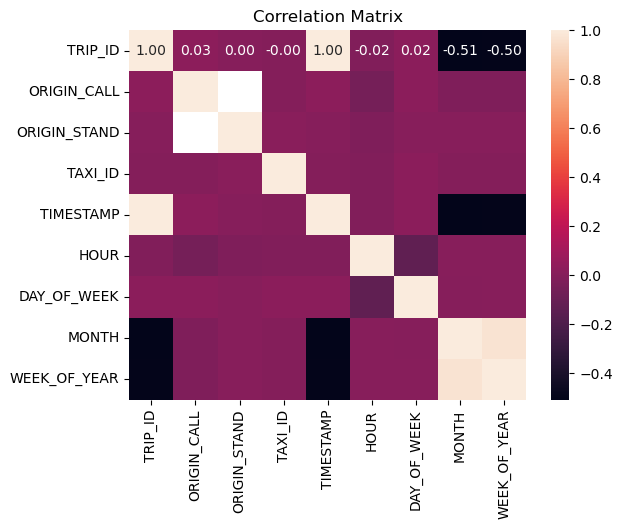

In [10]:
numeric_train = train.select_dtypes(include=[np.number])
corr_matrix = numeric_train.corr()

ax = sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

#### Extract Spatial Features from POLYLINE

Start coordinates
End coordinates (for training only, as test is partial)
Distance traveled (for training)
Average speed (for training)
For partial polylines in the test set, you may want to just extract start and last-known coordinates.

In [11]:
def parse_polyline(poly_str):
    # Convert from string to list
    # Some rows may be empty or malformed; handle exceptions
    try:
        poly = ast.literal_eval(poly_str)
        if len(poly) == 0:
            return np.nan
        return poly
    except:
        return np.nan

train['POLYLINE_LIST'] = train['POLYLINE'].apply(parse_polyline)
test['POLYLINE_LIST'] = test['POLYLINE'].apply(parse_polyline)

# Extract start coordinates
train['START_LON'] = train['POLYLINE_LIST'].apply(lambda x: x[0][0] if isinstance(x, list) and len(x)>0 else np.nan)
train['START_LAT'] = train['POLYLINE_LIST'].apply(lambda x: x[0][1] if isinstance(x, list) and len(x)>0 else np.nan)

test['START_LON'] = test['POLYLINE_LIST'].apply(lambda x: x[0][0] if isinstance(x, list) and len(x)>0 else np.nan)
test['START_LAT'] = test['POLYLINE_LIST'].apply(lambda x: x[0][1] if isinstance(x, list) and len(x)>0 else np.nan)

# Extract end coordinates (only for training, since test trips may be incomplete)
train['END_LON'] = train['POLYLINE_LIST'].apply(lambda x: x[-1][0] if isinstance(x, list) and len(x)>0 else np.nan)
train['END_LAT'] = train['POLYLINE_LIST'].apply(lambda x: x[-1][1] if isinstance(x, list) and len(x)>0 else np.nan)


##### This code first filters out rows with invalid final longitude data. It computes the horizontal (longitude) and vertical (latitude) displacement (delta) between the starting and ending points of each trip.

In [12]:
#drop rows where polyline is empty or invalid
train = train[train['POLYLINE_LIST'].notna()]
train = train.query("END_LON != 0")
train['delta_lon'] = train['END_LON'] - train['START_LON']
train['delta_lat'] = train['END_LAT'] - train['START_LAT']

# Trip time in seconds: (number_of_points - 1) * 15
train['TRIP_DURATION'] = train['POLYLINE_LIST'].apply(lambda x: (len(x)-1)*15 if isinstance(x, list) and len(x)>1 else np.nan)


##### Handle Missing Values and process Categorical Features

In [20]:
# Filter out outliers in delta_lon and delta_lat
train = train.query("delta_lon <= 0.2 & delta_lon >= -0.2 & delta_lat <= 0.2 & delta_lat >= -0.2")

# Map CALL_TYPE values to numeric codes
map_call = {"A": 1, "B": 2, "C": 3}
train["Call_type"] = train["CALL_TYPE"].map(map_call)

# Convert ORIGIN_CALL to a binary flag: 1 if not None, 0 if None
def origin_call_flg(x):
    return 0 if x["ORIGIN_CALL"] is None else 1
train["ORIGIN_CALL"] = train.apply(origin_call_flg, axis=1)

# Convert ORIGIN_STAND to a binary flag: 1 if not None, 0 if None
def origin_stand_flg(x):
    return 0 if x["ORIGIN_STAND"] is None else 1
train["ORIGIN_STAND"] = train.apply(origin_stand_flg, axis=1)

# Drop DAY_TYPE column if it provides no variability
if "DAY_TYPE" in train.columns:
    train.drop("DAY_TYPE", axis=1, inplace=True)

# Convert MISSING_DATA to a binary flag: 0 if "False", 1 otherwise
def miss_flg(x):
    return 0 if x["MISSING_DATA"] == "False" else 1
train["MISSING_DATA"] = train.apply(miss_flg, axis=1)

#Map CALL_TYPE values to numeric codes
map_call = {"A": 1, "B": 2, "C": 3}
test["Call_type"] = test["CALL_TYPE"].map(map_call)

# Convert ORIGIN_CALL to a binary flag: 1 if not None, 0 if None
def origin_call_flg(x):
    return 0 if x["ORIGIN_CALL"] is None else 1
test["ORIGIN_CALL"] = test.apply(origin_call_flg, axis=1)

# Convert ORIGIN_STAND to a binary flag: 1 if not None, 0 if None
def origin_stand_flg(x):
    return 0 if x["ORIGIN_STAND"] is None else 1
test["ORIGIN_STAND"] = test.apply(origin_stand_flg, axis=1)

# Drop DAY_TYPE column if it provides no variability
if "DAY_TYPE" in test.columns:
    test.drop("DAY_TYPE", axis=1, inplace=True)

# Convert MISSING_DATA to a binary flag: 0 if "False", 1 otherwise
def miss_flg(x):
    return 0 if x["MISSING_DATA"] == "False" else 1
test["MISSING_DATA"] = test.apply(miss_flg, axis=1)



#### Compute Haversine Distance
The haversine formula is used to calculate the great-circle distance between two points on a sphere from their longitudes and latitudes.

In [14]:
import numpy as np
from math import radians, sin, cos, sqrt, atan2
from pandarallel import pandarallel

def haversine_vectorized(lon1, lat1, lon2, lat2):
    R = 6371e3  # Earth radius in meters
    # Convert degrees to radians
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    
    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2)**2 + np.cos(lat1)*np.cos(lat2)*np.sin(dlon/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    distances = R * c
    return distances

def total_route_distance_vectorized(poly):
    if not isinstance(poly, list) or len(poly) < 2:
        return np.nan
    coords = np.array(poly)
    # coords is an N x 2 array: [[lon1, lat1], [lon2, lat2], ...]
    lons = coords[:, 0]
    lats = coords[:, 1]

    # Compute haversine distance for all consecutive pairs in one go
    dist_array = haversine_vectorized(lons[:-1], lats[:-1], lons[1:], lats[1:])
    return dist_array.sum()


train['TOTAL_DISTANCE'] = train['POLYLINE_LIST'].apply(total_route_distance_vectorized)
test['TOTAL_DISTANCE'] = test['POLYLINE_LIST'].apply(total_route_distance_vectorized)

#### Calculte bearing distance 
Bearing refers to the direction from one point to another point on the Earth’s surface, usually expressed as an angle relative to north. 

In [16]:
import math

def calculate_bearing(lon1, lat1, lon2, lat2):
    """
    Calculate the bearing from the point (lat1, lon1) to (lat2, lon2).
    Bearing is returned in degrees from North (0°) clockwise.
    """
    # Convert degrees to radians
    lon1, lat1, lon2, lat2 = map(math.radians, [lon1, lat1, lon2, lat2])

    d_lon = lon2 - lon1
    y = math.sin(d_lon) * math.cos(lat2)
    x = math.cos(lat1)*math.sin(lat2) - math.sin(lat1)*math.cos(lat2)*math.cos(d_lon)
    bearing = math.degrees(math.atan2(y, x))
    
    # Normalize bearing to 0-360 degrees
    bearing = (bearing + 360) % 360
    return bearing

In [17]:
# Compute bearing for the training data
train['BEARING'] = train.apply(lambda row: 
                               calculate_bearing(row['START_LON'], row['START_LAT'], 
                                                 row['END_LON'], row['END_LAT'])
                               if not pd.isnull(row['START_LON']) and not pd.isnull(row['END_LON']) 
                               else np.nan, axis=1)
# For test data, use the last known coordinate as an end point
test['BEARING'] = test.apply(lambda row: 
                             calculate_bearing(row['START_LON'], row['START_LAT'], 
                                               row['START_LON'] if pd.isnull(row.get('END_LON', np.nan)) else row['END_LON'],
                                               row['START_LAT'] if pd.isnull(row.get('END_LAT', np.nan)) else row['END_LAT'])
                             if not pd.isnull(row['START_LON']) and not pd.isnull(row['START_LAT']) else np.nan, axis=1)


#### Calculate Speed

In [21]:
test['TRIP_DURATION'] = test['POLYLINE_LIST'].apply(lambda x: (len(x)-1)*15 if isinstance(x, list) and len(x)>1 else np.nan)

# For train
train['AVG_SPEED'] = train.apply(lambda row: (row['TOTAL_DISTANCE'] / row['TRIP_DURATION']) if row['TRIP_DURATION'] > 0 else np.nan, axis=1)
test['AVG_SPEED'] = test.apply(lambda row: (row['TOTAL_DISTANCE'] / row['TRIP_DURATION']) if row['TRIP_DURATION'] > 0 else np.nan, axis=1)

In [22]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1699675 entries, 0 to 1710669
Data columns (total 25 columns):
 #   Column          Dtype         
---  ------          -----         
 0   TRIP_ID         int64         
 1   CALL_TYPE       object        
 2   ORIGIN_CALL     int64         
 3   ORIGIN_STAND    int64         
 4   TAXI_ID         int64         
 5   TIMESTAMP       int64         
 6   MISSING_DATA    int64         
 7   POLYLINE        object        
 8   DATETIME        datetime64[ns]
 9   HOUR            int32         
 10  DAY_OF_WEEK     int32         
 11  MONTH           int32         
 12  WEEK_OF_YEAR    int64         
 13  POLYLINE_LIST   object        
 14  START_LON       float64       
 15  START_LAT       float64       
 16  END_LON         float64       
 17  END_LAT         float64       
 18  delta_lon       float64       
 19  delta_lat       float64       
 20  TRIP_DURATION   float64       
 21  TOTAL_DISTANCE  float64       
 22  BEARING         float64

In [24]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math

# Assuming 'train' and 'test' DataFrames are already loaded with columns shown in the info.

# Check which features are present in both train and test
print("Train columns:", train.columns)
print("Test columns:", test.columns)

Train columns: Index(['TRIP_ID', 'CALL_TYPE', 'ORIGIN_CALL', 'ORIGIN_STAND', 'TAXI_ID',
       'TIMESTAMP', 'MISSING_DATA', 'POLYLINE', 'DATETIME', 'HOUR',
       'DAY_OF_WEEK', 'MONTH', 'WEEK_OF_YEAR', 'POLYLINE_LIST', 'START_LON',
       'START_LAT', 'END_LON', 'END_LAT', 'delta_lon', 'delta_lat',
       'TRIP_DURATION', 'TOTAL_DISTANCE', 'BEARING', 'AVG_SPEED', 'Call_type'],
      dtype='object')
Test columns: Index(['TRIP_ID', 'CALL_TYPE', 'ORIGIN_CALL', 'ORIGIN_STAND', 'TAXI_ID',
       'TIMESTAMP', 'MISSING_DATA', 'POLYLINE', 'DATETIME', 'HOUR',
       'DAY_OF_WEEK', 'MONTH', 'WEEK_OF_YEAR', 'POLYLINE_LIST', 'START_LON',
       'START_LAT', 'TOTAL_DISTANCE', 'BEARING', 'Call_type', 'TRIP_DURATION',
       'AVG_SPEED'],
      dtype='object')


In [26]:
# Drop rows where TRIP_DURATION, TOTAL_DISTANCE, or AVG_SPEED is NaN
train = train.dropna(subset=['TRIP_DURATION', 'TOTAL_DISTANCE', 'AVG_SPEED'])
# Drop rows where TRIP_DURATION, TOTAL_DISTANCE, or AVG_SPEED is NaN
test = test.dropna(subset=['TRIP_DURATION', 'TOTAL_DISTANCE', 'AVG_SPEED'])


# Calculate percentage of missing data per column for train and test datasets
train_missing_percent = train.isnull().mean() * 100
test_missing_percent = test.isnull().mean() * 100

# Calculate overall percentage of missing data in train and test datasets
train_total_missing_percent = train.isnull().sum().sum() / (train.shape[0] * train.shape[1]) * 100
test_total_missing_percent = test.isnull().sum().sum() / (test.shape[0] * test.shape[1]) * 100

# Display the results
print("Percentage of missing data per column in Train Dataset:")
print(train_missing_percent)

print("\nOverall percentage of missing data in Train Dataset:")
print(f"{train_total_missing_percent:.2f}%")

print("\nPercentage of missing data per column in Test Dataset:")
print(test_missing_percent)

print("\nOverall percentage of missing data in Test Dataset:")
print(f"{test_total_missing_percent:.2f}%")

Percentage of missing data per column in Train Dataset:
TRIP_ID           0.0
CALL_TYPE         0.0
ORIGIN_CALL       0.0
ORIGIN_STAND      0.0
TAXI_ID           0.0
TIMESTAMP         0.0
MISSING_DATA      0.0
POLYLINE          0.0
DATETIME          0.0
HOUR              0.0
DAY_OF_WEEK       0.0
MONTH             0.0
WEEK_OF_YEAR      0.0
POLYLINE_LIST     0.0
START_LON         0.0
START_LAT         0.0
END_LON           0.0
END_LAT           0.0
delta_lon         0.0
delta_lat         0.0
TRIP_DURATION     0.0
TOTAL_DISTANCE    0.0
BEARING           0.0
AVG_SPEED         0.0
Call_type         0.0
dtype: float64

Overall percentage of missing data in Train Dataset:
0.00%

Percentage of missing data per column in Test Dataset:
TRIP_ID           0.0
CALL_TYPE         0.0
ORIGIN_CALL       0.0
ORIGIN_STAND      0.0
TAXI_ID           0.0
TIMESTAMP         0.0
MISSING_DATA      0.0
POLYLINE          0.0
DATETIME          0.0
HOUR              0.0
DAY_OF_WEEK       0.0
MONTH             0.0

Validation MAE: 1.00 seconds
Validation RMSE: 42.98 seconds


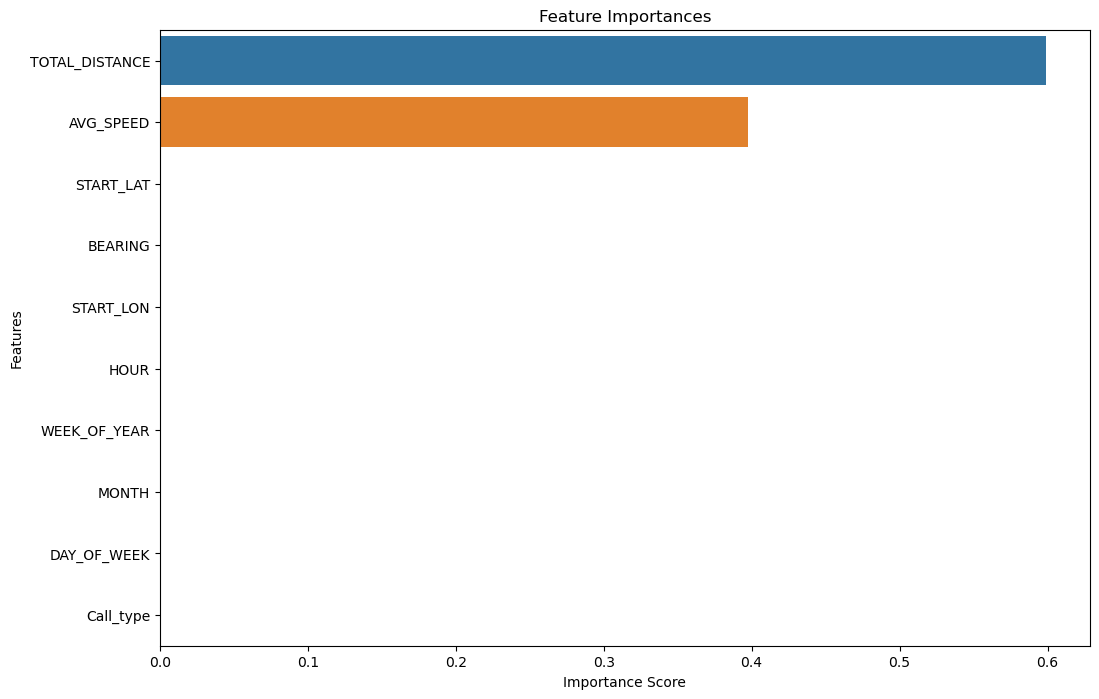

  TRIP_ID  PREDICTED_DURATION
0      T1              149.85
1      T2              585.00
2      T3              585.00
3      T4              104.25
4      T5               15.00


In [27]:
feature_cols = [
    'HOUR', 'DAY_OF_WEEK', 'MONTH', 'WEEK_OF_YEAR',
    'START_LON', 'START_LAT',
    'TOTAL_DISTANCE', 'AVG_SPEED', 
    'Call_type',
    'BEARING'
]

# Drop any rows with missing in feature_cols in train
train_rf = train.dropna(subset=feature_cols + ['TRIP_DURATION'])

# Prepare feature matrix and target
X = train_rf[feature_cols]
y = train_rf['TRIP_DURATION']

# Prepare test feature matrix
X_test = test[feature_cols]

# Split train into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest Regressor
rf = RandomForestRegressor(
    n_estimators=100,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

# Train the model
rf.fit(X_train, y_train)

# Predict on validation set
y_pred_val = rf.predict(X_val)

# Evaluate
mae = mean_absolute_error(y_val, y_pred_val)
rmse = math.sqrt(mean_squared_error(y_val, y_pred_val))
print(f"Validation MAE: {mae:.2f} seconds")
print(f"Validation RMSE: {rmse:.2f} seconds")

# Optional: Plot feature importances
importances = rf.feature_importances_
feature_importances = pd.Series(importances, index=feature_cols).sort_values(ascending=False)
plt.figure(figsize=(12,8))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title("Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

# Predict on test
test['PREDICTED_DURATION'] = rf.predict(X_test)

# Display predictions
print(test[['TRIP_ID', 'PREDICTED_DURATION']].head())

# Optionally, save predictions to a CSV
test[['TRIP_ID', 'PREDICTED_DURATION']].to_csv('predicted_durations.csv', index=False)

In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
r2 = r2_score(y_val, y_pred_val)

print(f"Validation MAE: {mae:.2f} seconds")
print(f"Validation RMSE: {rmse:.2f} seconds")
print(f"Validation R² Score: {r2:.4f}")

Validation MAE: 1.00 seconds
Validation RMSE: 42.98 seconds
Validation R² Score: 0.9953


In [37]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42, n_jobs=-1),
    param_grid=param_grid,
    cv=3,
    scoring='neg_mean_absolute_error',
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best MAE: {-grid_search.best_score_:.2f} seconds")

# Use the best estimator
best_rf = grid_search.best_estimator_
y_pred_val_best = best_rf.predict(X_val)
mae_best = mean_absolute_error(y_val, y_pred_val_best)
rmse_best = math.sqrt(mean_squared_error(y_val, y_pred_val_best))
print(f"Validation MAE (Best): {mae_best:.2f} seconds")
print(f"Validation RMSE (Best): {rmse_best:.2f} seconds")


Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=15.1min
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=15.1min
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=15.1min
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=15.2min
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=15.2min


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math
import seaborn as sns
import matplotlib.pyplot as plt

feature_cols = [
    'HOUR', 'DAY_OF_WEEK', 'MONTH', 'WEEK_OF_YEAR',
    'START_LON', 'START_LAT',
    'TOTAL_DISTANCE', 'AVG_SPEED', 
    'Call_type',
    'BEARING'
]

# Drop any rows with missing in feature_cols in train
train = train.dropna(subset=feature_cols + ['TRIP_DURATION'])

# Prepare feature matrix and target
X = train[feature_cols]
y = train['TRIP_DURATION']

# Prepare test feature matrix
X_test = test[feature_cols]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

gb = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

gb.fit(X_train, y_train)

y_pred_val = gb.predict(X_val)
mae = mean_absolute_error(y_val, y_pred_val)
rmse = math.sqrt(mean_squared_error(y_val, y_pred_val))
r2 = r2_score(y_val, y_pred_val)

print(f"Validation MAE: {mae:.2f} seconds")
print(f"Validation RMSE: {rmse:.2f} seconds")
print(f"Validation R² Score: {r2:.4f}")

importances = gb.feature_importances_
feature_importances = pd.Series(importances, index=feature_cols).sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importances, y=feature_importances.index, palette='viridis')
plt.title("Feature Importances in Gradient Boosting Model")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

# Combine actual and predicted values into a DataFrame for easier handling
validation_results = pd.DataFrame({
    'Actual_Duration': y_val.reset_index(drop=True),
    'Predicted_Duration': y_pred_val
}).reset_index(drop=True)

# Sort by Actual Duration
validation_results_sorted = validation_results.sort_values(by='Actual_Duration').reset_index(drop=True)

# Sample 100 Equally Spaced Points
sample_size = 100
total_points = len(validation_results_sorted)

# Calculate step size to evenly sample the data
step = max(total_points // sample_size, 1)

# Select indices for sampling
sample_indices = np.arange(0, total_points, step)[:sample_size]

# Extract the sampled data
sampled_validation = validation_results_sorted.iloc[sample_indices].reset_index(drop=True)

# Plot Actual vs Predicted Durations (Line Plot)
plt.figure(figsize=(14, 7))
plt.plot(sampled_validation.index, sampled_validation['Actual_Duration'], label='Actual Duration', color='blue', marker='o')
plt.plot(sampled_validation.index, sampled_validation['Predicted_Duration'], label='Predicted Duration', color='orange', marker='x')
plt.title("Actual vs Predicted Trip Duration for 100 Test Trips")
plt.xlabel("Trip Index (sorted by Actual Duration)")
plt.ylabel("Duration (seconds)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Predict on test
test['PREDICTED_DURATION'] = gb.predict(X_test)

# Display predictions
print(test[['TRIP_ID', 'PREDICTED_DURATION']].head())

# Optionally, save predictions to a CSV
test[['TRIP_ID', 'PREDICTED_DURATION']].to_csv('predicted_durations_gradient_boosting.csv', index=False)
print("Predictions saved to 'predicted_durations_gradient_boosting.csv'")
